# Antenas y Mediciones

In [1]:
# LIBRERIAS
from pykml import parser
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

# Cargar Base de Datos
Antenas = pd.read_csv('database/Antenas_2_1_2023.csv') 
Mediciones1 = pd.read_csv('database/Mediciones1_2_1_2023.csv') 
Mediciones2 = pd.read_csv('database/Mediciones2_2_1_2023.csv') 

(10.0, 135.0)

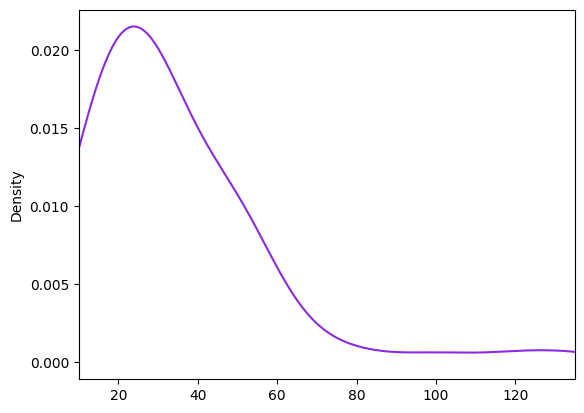

In [2]:
#Antenas['altura'].describe()
Antenas["altura"].plot.density(color="blueviolet").set_xlim(10,135)

(0.0, 5.0)

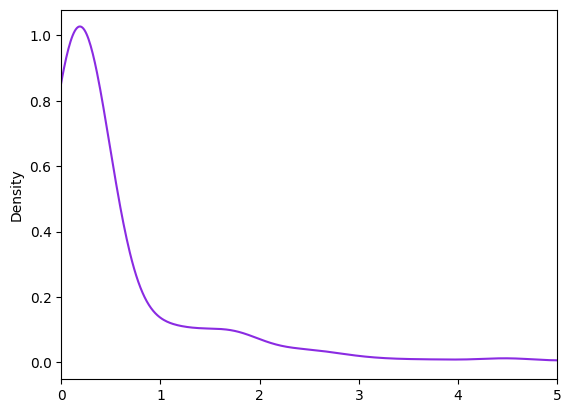

In [3]:
Mediciones3 = Mediciones1
Mediciones3.drop(59,axis=0,inplace=True)
#Mediciones3["densidad de potencia"].describe()
#Mediciones3["densidad de potencia"].plot.hist(bins=40,color="blueviolet").set_xlim(0,5.5)
Mediciones3["densidad de potencia"].plot.density(color="blueviolet").set_xlim(0,5)

(0.0, 15.0)

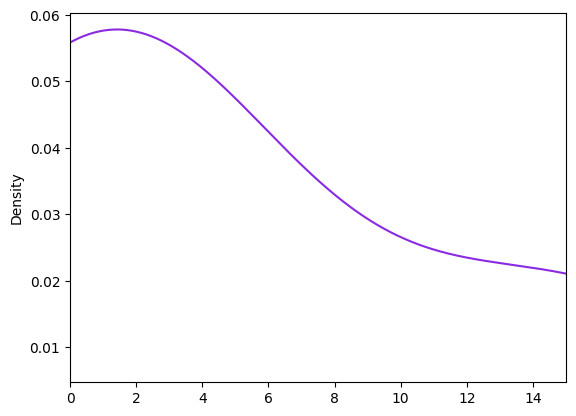

In [4]:
#Mediciones2["densidad de potencia"].describe()
Mediciones2["densidad de potencia"].plot.density(color="blueviolet").set_xlim(0,15)

In [5]:
import folium as fo
map1 = fo.Map(location=[-37.99,-57.55],
                    zoom_start = 14)
map2 = fo.Map(location=[-37.99,-57.55],
                    zoom_start = 14)
lat_fol_ant = list(Antenas["Latitude"].astype(float))
lon_fol_ant = list(Antenas["Longitude"].astype(float))
name_fol_ant = Antenas.index.tolist()
fol_antena = fo.FeatureGroup(name="Antenas")

lat_fol_med1 = list(Mediciones1["Latitude"].astype(float))
lon_fol_med1 = list(Mediciones1["Longitude"].astype(float))
name_fol_med1 = Mediciones1.index.tolist()
fol_medicion1 = fo.FeatureGroup(name="Mediciones1")

lat_fol_med2 = list(Mediciones2["Latitude"].astype(float))
lon_fol_med2 = list(Mediciones2["Longitude"].astype(float))
name_fol_med2 = Mediciones2.index.tolist()
fol_medicion2 = fo.FeatureGroup(name="Mediciones2")

In [6]:
for lat,lon,name in zip(lat_fol_ant, lon_fol_ant,name_fol_ant):
    fol_antena.add_child(fo.Marker(location=[lat, lon], popup = name, icon = fo.Icon(color="blue",icon="wifi",prefix="fa")))
    
for lat1,lon1,name1 in zip(lat_fol_med1, lon_fol_med1,name_fol_med1):
                         fol_medicion1.add_child(fo.Marker(location=[lat1, lon1], popup = name1, icon = fo.Icon(color="green")))

for lat2,lon2,name2 in zip(lat_fol_med2, lon_fol_med2,name_fol_med2):
                         fol_medicion2.add_child(fo.Marker(location=[lat2, lon2], popup = name2, icon = fo.Icon(color="purple")))


In [7]:
map1.add_child(fol_antena)
map1.add_child(fol_medicion1)
map1.add_child(fol_medicion2)

In [8]:
import folium as fo
from folium import plugins
from folium.plugins import HeatMap

map35 = fo.Map(location=[-37.99,-57.55],
                    zoom_start = 14)

longs =Mediciones1["Longitude"]
lats = Mediciones1["Latitude"]

# calcular los valores medios de longitud y latitud
#import statistics
#meanLong = statistics.mean(longs)
#meanLat = statistics.mean(lats)

# crear capa de mapa de calor
heatmap = HeatMap(list(zip(lats, longs, Mediciones1["densidad de potencia"])),min_opacity=0.2,radius=30,gradient={0:
'blue',0.2: 'lime',0.7:'yellow',0.95: 'orange' ,1: 'red'},blur=5,max_zoom=2)
# añadir capa de mapa de calor al mapa base

heatmap.add_to(map35)
map35.add_child(fol_antena)
map35

In [9]:
map35.add_child(fol_antena)